#  Instacart Market Basket Analysis EDA
This notebook uses a dataset from [Kaggle's Instacart Market Basket Analysis](https://www.kaggle.com/c/instacart-market-basket-analysis) competition:
>In this competition, Instacart is challenging the Kaggle community to use this anonymized data on customer orders over time to predict which previously purchased products will be in a user’s next order. 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

## Overview

In [2]:
orders = pd.read_csv('orders.csv')
orders.shape

(3421083, 7)

In [3]:
orders.days_since_prior_order.fillna(orders.days_since_prior_order.median(), inplace=True)
orders.days_since_prior_order = orders.days_since_prior_order.apply(int)
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,7
1,2398795,1,prior,2,3,7,15
2,473747,1,prior,3,3,12,21
3,2254736,1,prior,4,4,7,29
4,431534,1,prior,5,4,15,28


In [22]:
print('Number of rows: {} in the prior set, {} in the train set, {} in the test set'.format(
    *orders.eval_set.value_counts()))

Number of rows: 3214874 in the prior set, 131209 in the train set, 75000 in the test set


In [24]:
data = orders.groupby('eval_set')['user_id'].agg(lambda x: len(np.unique(x)))

print('Number of customers: {} in total, {} in the train set, {} in the test set'.format(
    *orders.eval_set.value_counts()))

Number of customers: 3214874 in total, 131209 in the train set, 75000 in the test set


## When do people order?

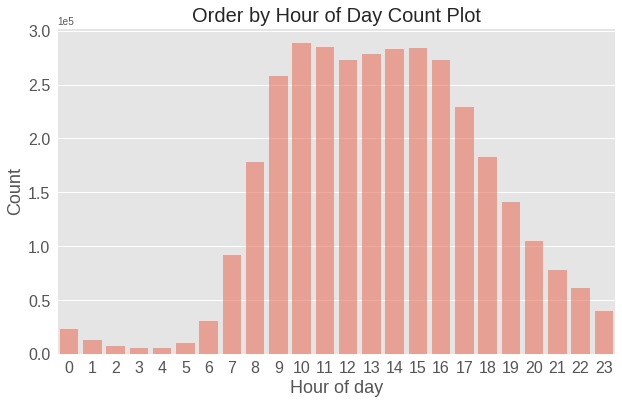

In [13]:
fig = plt.figure(figsize=(10,6))
plt.tick_params(labelsize=16)
plt.ticklabel_format(style='sci', scilimits=(0,0), axis='y')

sns.countplot(orders.order_hour_of_day, color='tomato', alpha=0.6)

plt.xlabel('Hour of day', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Order by Hour of Day Count Plot', fontsize=20)
plt.show()

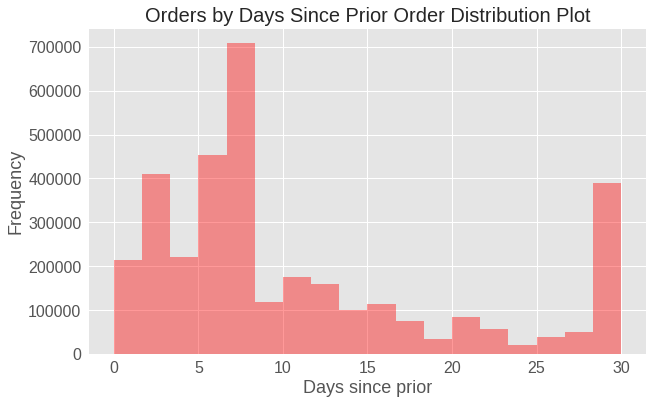

In [10]:
fig = plt.figure(figsize=(10,6))
plt.tick_params(labelsize=16)

sns.distplot(orders.days_since_prior_order, bins=18, kde=False, color='red')

plt.xlabel('Days since prior', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Orders by Days Since Prior Order Distribution Plot', fontsize=20)
plt.show()

## How many items do people buy?

In [6]:
order_products_train = pd.read_csv('order_products_train.csv')
order_products_train.shape

(1384617, 4)

In [7]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [8]:
print('Number of unique orders in the train set: {}'.format(
    len(order_products_train.order_id.unique())))

Number of unique orders in the train set: 131209


In [9]:
print('Number of unique products in the train set: {}'.format(
    len(order_products_train.product_id.unique())))

Number of unique products in the train set: 39123


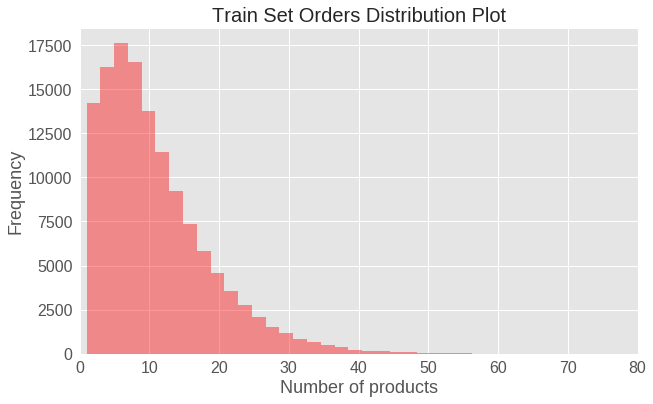

In [10]:
fig = plt.figure(figsize=(10,6))
plt.tick_params(labelsize=16)

data = order_products_train.groupby('order_id')['add_to_cart_order'].aggregate('max')
sns.distplot(data, bins=40, kde=False, color='red')

plt.xlabel('Number of products', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Train Set Orders Distribution Plot', fontsize=20)
plt.xlim([0, 80])
plt.show()

In [11]:
order_products_prior = pd.read_csv('order_products_prior.csv')
order_products_prior.shape

(32434489, 4)

In [12]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [13]:
print('Number of unique orders in the prior set: {}'.format(len(order_products_prior.order_id.unique())))

Number of unique orders in the prior set: 3214874


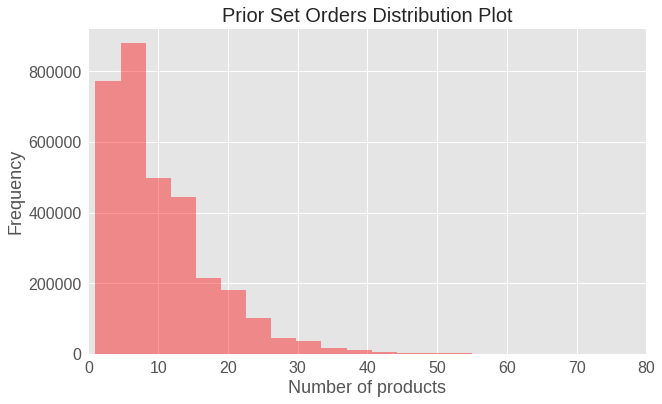

In [14]:
fig = plt.figure(figsize=(10,6))
plt.tick_params(labelsize=16)

data = order_products_prior.groupby('order_id')['add_to_cart_order'].aggregate('max')
sns.distplot(data, bins=40, kde=False, color='red')

plt.xlabel('Number of products', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Prior Set Orders Distribution Plot', fontsize=20)
plt.xlim([0, 80])
plt.show()

## Layouts

In [11]:
products = pd.read_csv('products.csv')
products.shape

(49688, 4)

In [12]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [13]:
print('Number of unique products: {}'.format(len(products.product_id.unique())))

Number of unique products: 49688


In [22]:
aisles = pd.read_csv('aisles.csv')
aisles.shape

(134, 2)

In [23]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [24]:
departments = pd.read_csv('departments.csv')
departments.shape

(21, 2)

In [25]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [26]:
order_products_train = pd.merge(order_products_train, products)
order_products_train = pd.merge(order_products_train, aisles)
order_products_train = pd.merge(order_products_train, departments)

order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,816049,49302,7,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
2,1242203,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
3,1383349,49302,11,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
4,1787378,49302,8,0,Bulgarian Yogurt,120,16,yogurt,dairy eggs


## Products

In [86]:
products_train = order_products_train.groupby(
    'product_name')['add_to_cart_order'].agg(['count'])
products_train.nlargest(10, columns='count').reset_index()

,product_name,count
0,Banana,18726
1,Bag of Organic Bananas,15480
2,Organic Strawberries,10894
3,Organic Baby Spinach,9784
4,Large Lemon,8135
5,Organic Avocado,7409
6,Organic Hass Avocado,7293
7,Strawberries,6494
8,Limes,6033
9,Organic Raspberries,5546


## Aisles

In [87]:
aisles_train = order_products_train.groupby(
    'aisle')['add_to_cart_order'].agg(['count'])
aisles_train.nlargest(10, columns='count').reset_index()

,aisle,count
0,fresh vegetables,150609
1,fresh fruits,150473
2,packaged vegetables fruits,78493
3,yogurt,55240
4,packaged cheese,41699
5,water seltzer sparkling water,36617
6,milk,32644
7,chips pretzels,31269
8,soy lactosefree,26240
9,bread,23635


## Departments

In [88]:
departments_train = order_products_train.groupby(
    'department')['add_to_cart_order'].agg(['count'])
departments_train.nlargest(10, columns='count').reset_index()

,department,count
0,produce,409087
1,dairy eggs,217051
2,snacks,118862
3,beverages,114046
4,frozen,100426
5,pantry,81242
6,bakery,48394
7,canned goods,46799
8,deli,44291
9,dry goods pasta,38713


## Reordered products

In [37]:
print('Percentage of reordered products in the prior set: {:.2f}%'.format((
    order_products_prior.reordered.sum() / len(order_products_prior)) * 100))

Percentage of reordered products in the prior set: 58.97%


In [89]:
print('Percentage of reordered products in the train set: {:.2f}%'.format((
    order_products_train.reordered.sum() / len(order_products_train)) * 100))

Percentage of reordered products in the train set: 59.86%


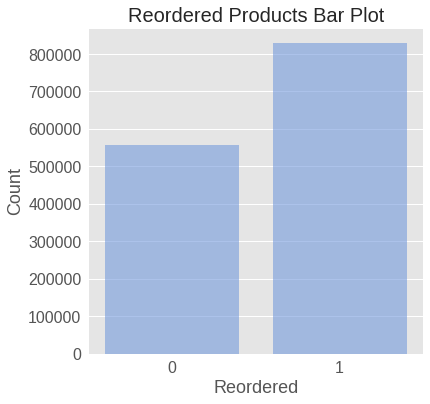

In [24]:
fig = plt.figure(figsize=(6,6))
plt.tick_params(labelsize=16)

data = order_products_train.groupby('reordered')['product_id'].aggregate(
    {'total': 'count'}).reset_index()
data['ratio'] = data.total.apply(lambda x: x / data.total.sum())

sns.barplot(data.index, data.total, color='cornflowerblue', alpha=0.6)

plt.xlabel('Reordered', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Reordered Products Bar Plot', fontsize=20)
plt.show()